In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import seaborn as sns

# Load the dataset

data = pd.read_csv('Employee (1).csv')

# Step 1: Data Exploration
# Rename columns for consistency
data.rename(
    columns={
        "Company": "company",
        "Age": "age",
        "Salary": "salary",
        "Place": "place",
        "Country": "country",
        "Gender": "gender",
    },
    inplace=True,
)

# Display unique values and lengths
unique_values = {col: {"unique_count": data[col].nunique(), "unique_values": data[col].unique()} for col in data.columns}
print("Unique values and counts:", unique_values)

# Statistical analysis
print(data.describe())

Unique values and counts: {'company': {'unique_count': 6, 'unique_values': array(['TCS', 'Infosys', 'CTS', nan, 'Tata Consultancy Services',
       'Congnizant', 'Infosys Pvt Lmt'], dtype=object)}, 'age': {'unique_count': 29, 'unique_values': array([20., 30., 35., 40., 23., nan, 34., 45., 18., 22., 32., 37., 50.,
       21., 46., 36., 26., 41., 24., 25., 43., 19., 38., 51., 31., 44.,
       33., 17.,  0., 54.])}, 'salary': {'unique_count': 40, 'unique_values': array([  nan, 2300., 3000., 4000., 5000., 6000., 7000., 8000., 9000.,
       1089., 1234., 3030., 3045., 3184., 4824., 5835., 7084., 8943.,
       8345., 9284., 9876., 2034., 7654., 2934., 4034., 5034., 8202.,
       9024., 4345., 6544., 6543., 3234., 4324., 5435., 5555., 8787.,
       3454., 5654., 5009., 5098., 3033.])}, 'place': {'unique_count': 11, 'unique_values': array(['Chennai', 'Mumbai', 'Calcutta', 'Delhi', 'Podicherry', 'Cochin',
       nan, 'Noida', 'Hyderabad', 'Bhopal', 'Nagpur', 'Pune'],
      dtype=object)}, 'coun

In [4]:
# Step 2: Data Cleaning
# Replace 0 in 'age' with NaN
data['age'] = data['age'].replace(0, np.nan)

# Handle missing values
data['company'] = data['company'].fillna(data['company'].mode()[0])  # Replace with mode
data['age'] = data['age'].fillna(data['age'].median())  # Replace with median
data['salary'] = data['salary'].fillna(data['salary'].median())  # Replace with median
data['place'] = data['place'].fillna(data['place'].mode()[0])  # Replace with mode

# Remove duplicate rows
data_cleaned = data.drop_duplicates()

# Identify outliers using IQR
def detect_outliers_iqr(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return (column < lower_bound) | (column > upper_bound)

age_outliers = detect_outliers_iqr(data_cleaned['age'])
salary_outliers = detect_outliers_iqr(data_cleaned['salary'])

print("Age Outliers:", age_outliers.sum())
print("Salary Outliers:", salary_outliers.sum())

Age Outliers: 0
Salary Outliers: 0


Filtered data:
      company   age  salary      place country  gender
21   Infosys  50.0  3184.0      Delhi   India       0
32   Infosys  45.0  4034.0   Calcutta   India       0
39   Infosys  41.0  3000.0     Mumbai   India       0
50   Infosys  41.0  3000.0    Chennai   India       0
57   Infosys  51.0  3184.0  Hyderabad   India       0
68   Infosys  43.0  4034.0     Mumbai   India       0
75   Infosys  44.0  3000.0     Cochin   India       0
86   Infosys  41.0  3000.0      Delhi   India       0
93   Infosys  54.0  3184.0     Mumbai   India       0
104  Infosys  44.0  4034.0      Delhi   India       0
122  Infosys  44.0  3234.0     Mumbai   India       0
129  Infosys  50.0  3184.0   Calcutta   India       0
138      CTS  44.0  3033.0     Cochin   India       0
140  Infosys  44.0  4034.0  Hyderabad   India       0
145  Infosys  44.0  4034.0      Delhi   India       1


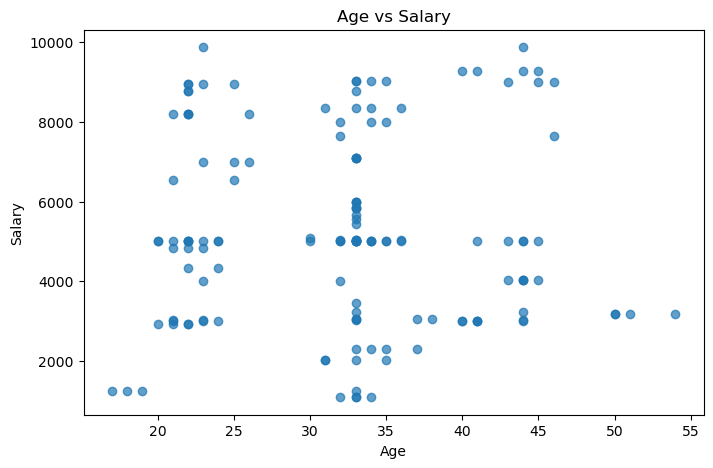

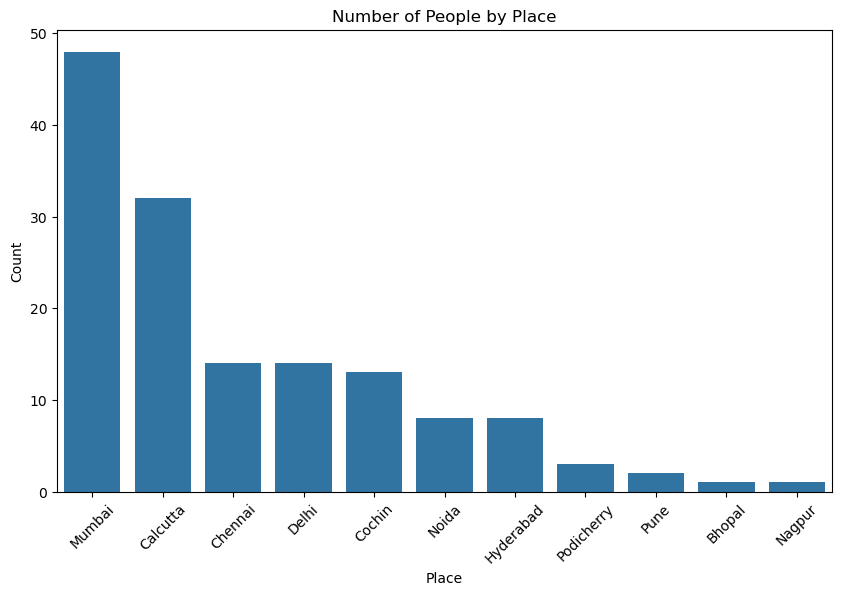

In [5]:
# Step 3: Data Analysis
# Filter data
filtered_data = data_cleaned[(data_cleaned['age'] > 40) & (data_cleaned['salary'] < 5000)]
print("Filtered data:\n", filtered_data)

# Plot age vs salary
plt.figure(figsize=(8, 5))
plt.scatter(data_cleaned['age'], data_cleaned['salary'], alpha=0.7)
plt.title('Age vs Salary')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.show()

# Count and visualize people by place
place_counts = data_cleaned['place'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=place_counts.index, y=place_counts.values)
plt.title('Number of People by Place')
plt.xlabel('Place')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


In [6]:
# Step 4: Data Encoding
# One-hot encoding for categorical variables
data_encoded = pd.get_dummies(data_cleaned, columns=['company', 'place'])

In [7]:
# Step 5: Feature Scaling
# StandardScaler
scaler = StandardScaler()
scaled_standard = scaler.fit_transform(data_encoded.select_dtypes(include=[np.number]))

# MinMaxScaler
minmax_scaler = MinMaxScaler()
scaled_minmax = minmax_scaler.fit_transform(data_encoded.select_dtypes(include=[np.number]))

# Display results
print("Standard Scaled Data:\n", scaled_standard[:5])
print("Min-Max Scaled Data:\n", scaled_minmax[:5])

Standard Scaled Data:
 [[-1.48467637 -0.10082748 -0.53452248]
 [-0.26717411 -0.10082748 -0.53452248]
 [ 0.34157702 -1.2437349  -0.53452248]
 [ 0.95032816 -0.94742557 -0.53452248]
 [-1.11942569 -0.52412653 -0.53452248]]
Min-Max Scaled Data:
 [[0.08108108 0.44508934 0.        ]
 [0.35135135 0.44508934 0.        ]
 [0.48648649 0.13781723 0.        ]
 [0.62162162 0.21748037 0.        ]
 [0.16216216 0.33128485 0.        ]]
